## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

In [2]:
! git clone https://www.github.com/ds4e/clustering

Cloning into 'clustering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 4.21 MiB | 8.74 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [3]:
#1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

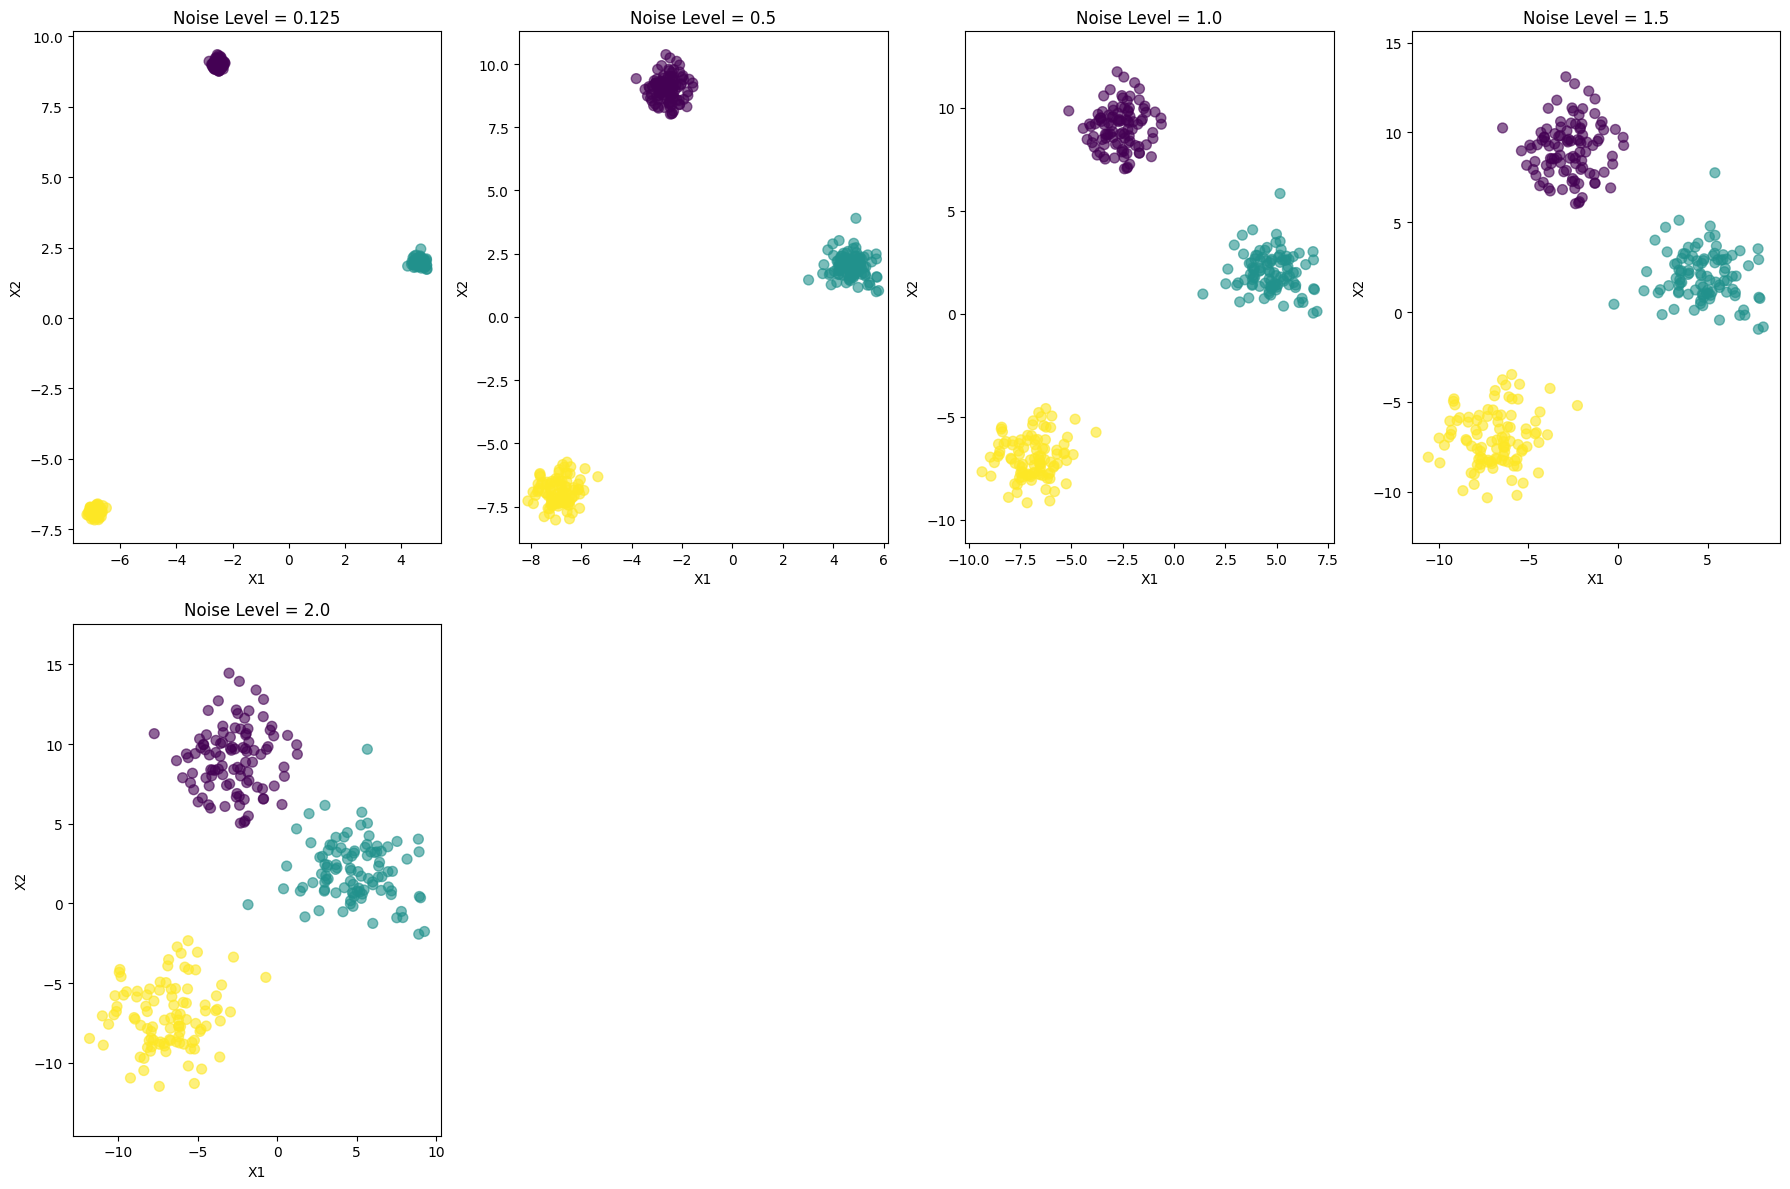

In [4]:
#2
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# scatterplots with noise
def plot_clusters_with_noise(noise_levels, n_samples=300, centers=3):
    plt.figure(figsize=(18, 12))

    for i, noise in enumerate(noise_levels, 1):
        # blobs with noise
        X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=42, cluster_std=noise)

        plt.subplot(2, 4, i)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.6)
        plt.title(f'Noise Level = {noise}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.axis('equal')

    plt.tight_layout()
    plt.show()

# noise levels
noise_levels = [0.125, 0.5, 1.0, 1.5, 2.0]
plot_clusters_with_noise(noise_levels)

As noise increases, clusters become less visually distinct, spreading out more and more, and forming less neat groups.

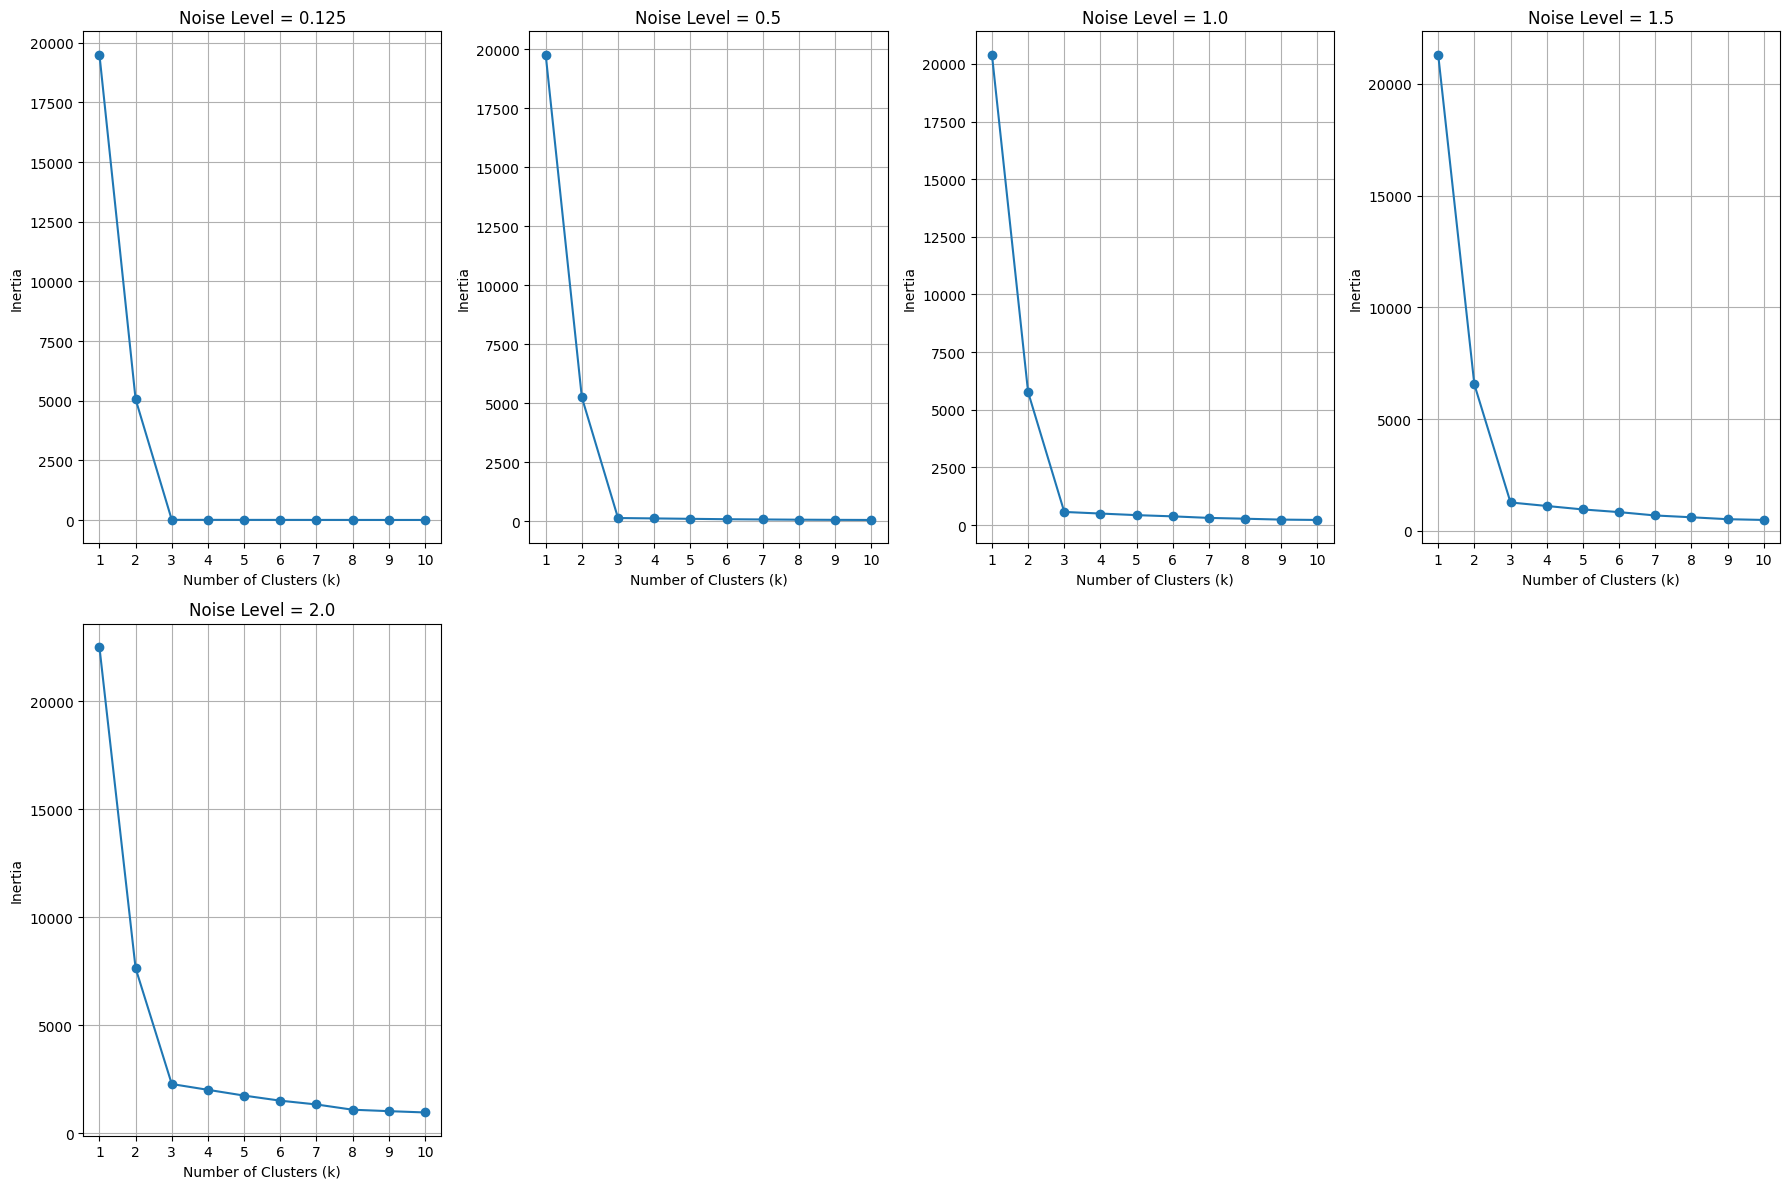

In [5]:
#3
from sklearn.cluster import KMeans
# scree plot function:
def scree_plot_for_noise_levels(noise_levels, n_samples=300, centers=3, max_k=10):
    plt.figure(figsize=(18, 12))

    for i, noise in enumerate(noise_levels, 1):
        # blobs with noise
        X, _ = make_blobs(n_samples=n_samples, centers=centers, random_state=42, cluster_std=noise)

        # squared differences (inertias? used Chat here)
        inertias = []
        for k in range(1, max_k + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X)
            inertias.append(kmeans.inertia_)

        # plot scree
        plt.subplot(2, 4, i)
        plt.plot(range(1, max_k + 1), inertias, marker='o')
        plt.title(f'Noise Level = {noise}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.xticks(range(1, max_k + 1))
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# noise levels
noise_levels = [0.125, 0.5, 1.0, 1.5, 2.0]
scree_plot_for_noise_levels(noise_levels)

The elbow is very obviously at 3 with noise level 0.125. However, as the noise level increases, the scree plot sort of lifts up off the ground, making the elbow less clear, and thus making it harder to determine an optimal k.

\#4
The elbow method is a way to determine the optimal number of clusters by seeing where among possible nuymbers of clusters the within-cluster sum of squared distances stops decreasing significantly. For example, here, we have 3 groups of points. At k=1, the distance between all of the points is very high, but once we reach k=3, the distance between all the points is very very low. Creating more groups, with k=4+, doesn't significantly decrease the this sum of squares, so we know we should divide the data into 3 groups. However, as we increase the noise levels, it becomes harder to determine the elbow, because creating more groups can account for points being more erraticly placed.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [6]:
#1
df = pd.read_csv('/content/clustering/assignment/data/2022 election cycle fundraising.csv')
def clean_money_columns(value):
    return int(value.replace('$', '').replace(',', ''))
df['Raised'] = df['Raised'].apply(clean_money_columns)
df['Spent'] = df['Spent'].apply(clean_money_columns)
df['Cash on Hand'] = df['Cash on Hand'].apply(clean_money_columns)
df['Debts'] = df['Debts'].apply(clean_money_columns)

df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


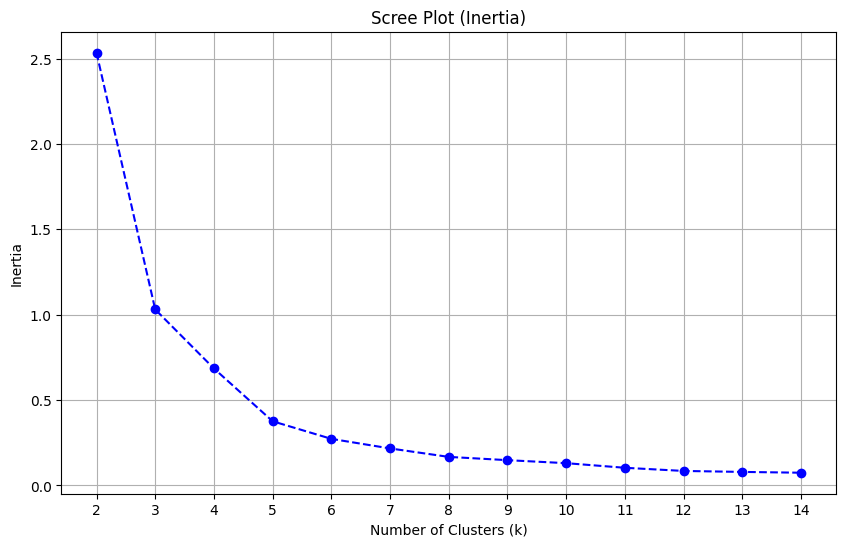

In [7]:
#2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# minmax scaling for 'Raised' and 'Spent'
scaler = MinMaxScaler()
df[['Raised', 'Spent']] = scaler.fit_transform(df[['Raised', 'Spent']])

inertia = []

# try k's from 2 to 14
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Raised', 'Spent']])
    inertia.append(kmeans.inertia_)

# scree plot (inertia)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), inertia, marker='o', linestyle='--', color='b', label='Inertia')
plt.title('Scree Plot (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 15))
plt.grid(True)
plt.show()

I think I'm gonna go with k=5 here.

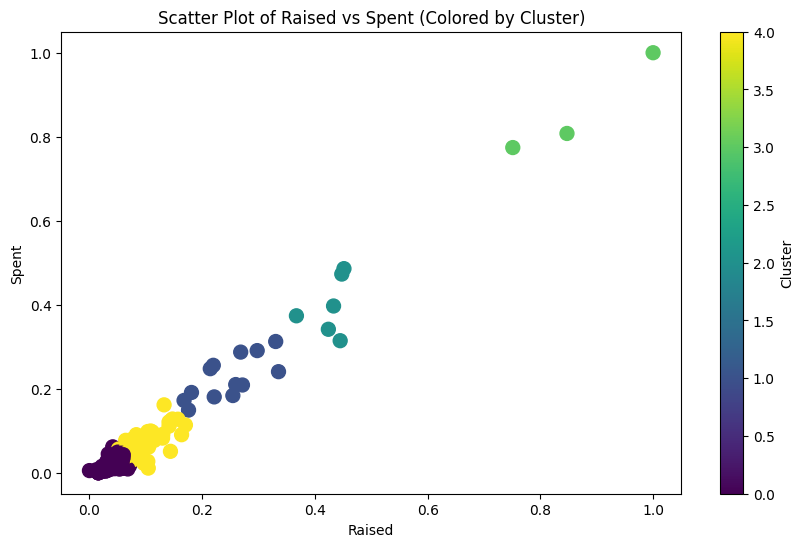

In [8]:
optimal_k = 5  # from elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Raised', 'Spent']])

# scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['Raised'], df['Spent'], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Scatter Plot of Raised vs Spent (Colored by Cluster)')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.colorbar(label='Cluster')
plt.show()

In [9]:
top_9_spent = df.nlargest(9, 'Raised')
top_9_spent[['Member', 'Raised','Party']]

,Member,Raised,Party
417,Raphael Warnock,1.000000,Democratic
340,Mark Kelly,0.847210,Democratic
523,Val Demings,0.751061,Democratic
499,Tim Ryan,0.451540,Democratic
87,Catherine Cortez Masto,0.447666,Democratic
500,Tim Scott,0.444817,Republican
328,Marco Rubio,0.433063,Republican
89,Chuck Schumer,0.423863,Democratic
326,Maggie Hassan,0.367193,Democratic


Raphael Warnock (the highest raiser and spender) won, but it looks like it was quite close!

Mark Kelly won without too much difficulty, and Val Demmings lost by a lot in Florida, as did Tim Ryan in Ohio. Catherine Cortez Masto won a close run in Ohio... it just looks like most of the biggest spenders were Democratic, and they thought they needed a lot of money to win.

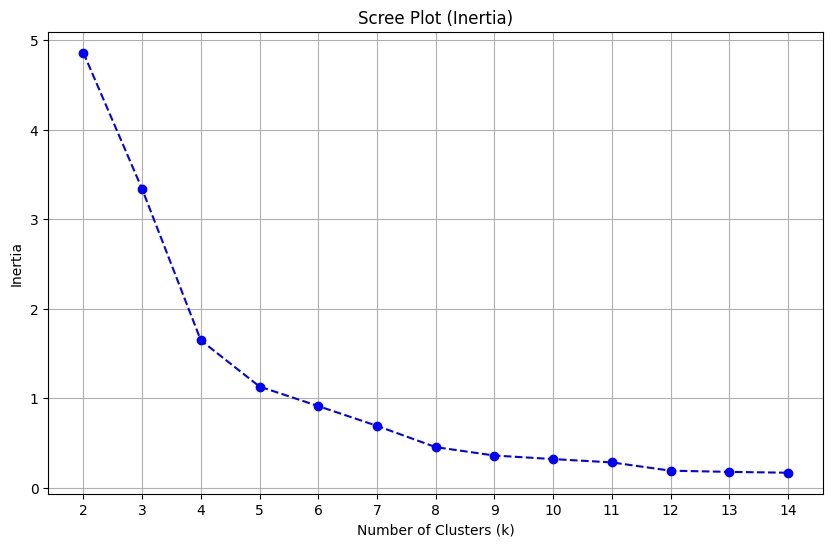

In [11]:
#3
# minmax scaling for 'Cash on Hand' and 'Debts'
scaler = MinMaxScaler()
df[['Cash on Hand', 'Debts']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])

inertia = []

# try k's from 2 to 14
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Cash on Hand', 'Debts']])
    inertia.append(kmeans.inertia_)

# scree plot (inertia)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), inertia, marker='o', linestyle='--', color='b', label='Inertia')
plt.title('Scree Plot (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 15))
plt.grid(True)
plt.show()

I'm goin' k=5 again.

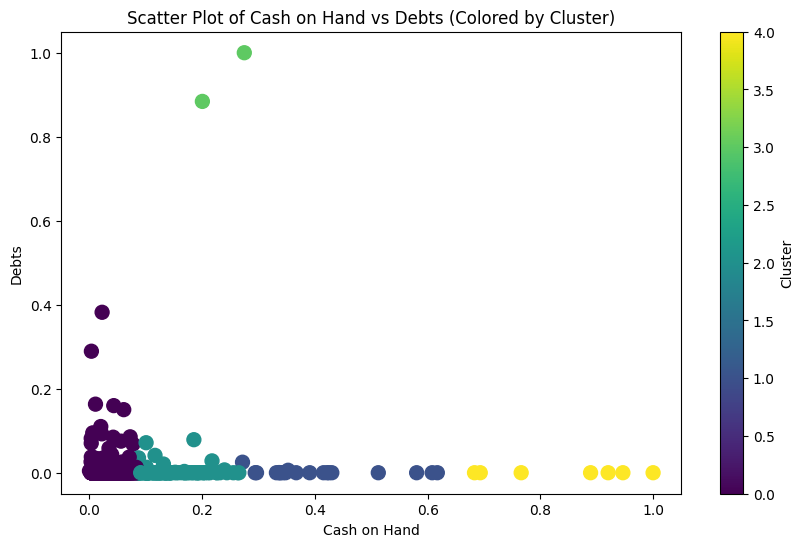

In [12]:
optimal_k = 5  # from elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Cash on Hand', 'Debts']])

# scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['Cash on Hand'], df['Debts'], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Scatter Plot of Cash on Hand vs Debts (Colored by Cluster)')
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
top_2_debts = df.nlargest(2, 'Debts')
print(top_2_debts[['Member', 'Debts','Party']])

top_7_cash = df.nlargest(7, 'Cash on Hand')
print(top_7_cash[['Member', 'Cash on Hand','Party']])

          Member     Debts       Party
133  David Trone  1.000000  Democratic
442  Ron Johnson  0.884067  Republican
              Member  Cash on Hand       Party
417  Raphael Warnock      1.000000  Democratic
500        Tim Scott      0.946418  Republican
2        Adam Schiff      0.920268  Democratic
89     Chuck Schumer      0.889092  Democratic
267       John Thune      0.765940  Republican
290     Katie Porter      0.693338  Democratic
261     John Kennedy      0.683153  Republican


The cluster of two super high debts is from one not-so-close race and one very close race. A few familiar faces from question 2 are in the high 'cash on hand' cluster, but this cluster is more evenly distributed across both parties. I guess Warnock could have spent even more had he wanted to.

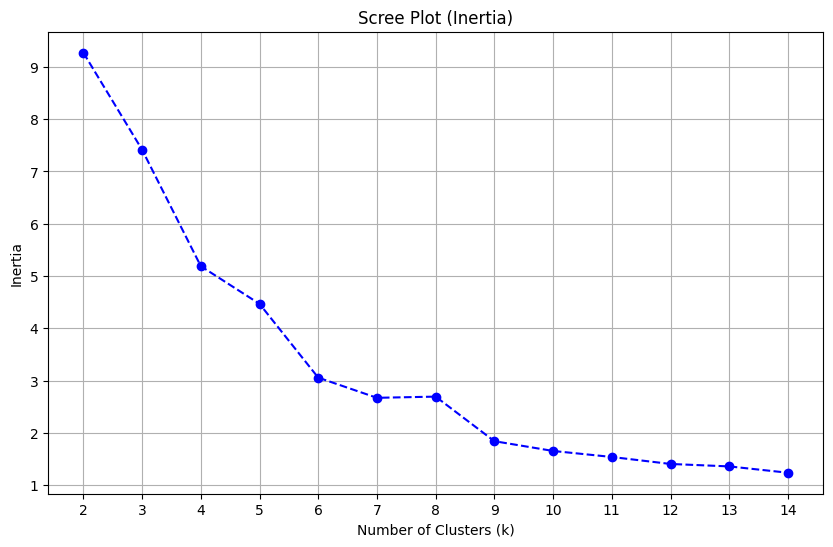

In [14]:
#4
df[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = scaler.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

inertia = []

# try k's from 2 to 14
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])
    inertia.append(kmeans.inertia_)

# scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), inertia, marker='o', linestyle='--', color='b', label='Inertia')
plt.title('Scree Plot (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 15))  # Updated xticks to match the range
plt.grid(True)
plt.show()

k=6 makes sense here.

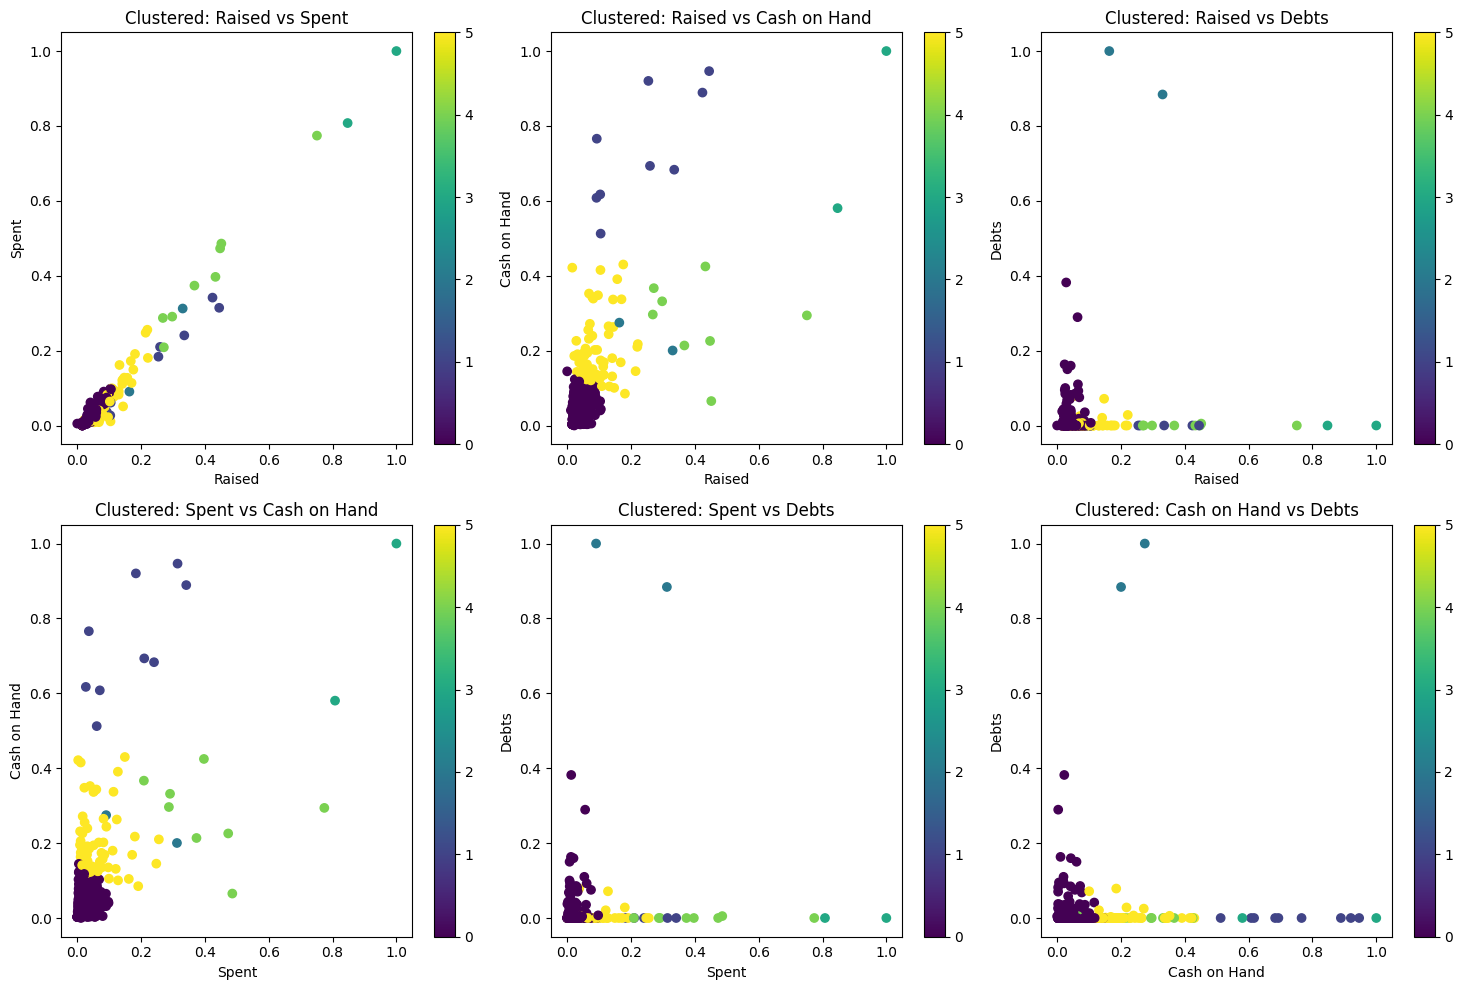

In [17]:
optimal_k = 6

kmeans_all = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_all'] = kmeans_all.fit_predict(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

# pair combinations of features to plot (Used chat here to make doing all 6 more efficient)
feature_pairs = [
    ('Raised', 'Spent'),
    ('Raised', 'Cash on Hand'),
    ('Raised', 'Debts'),
    ('Spent', 'Cash on Hand'),
    ('Spent', 'Debts'),
    ('Cash on Hand', 'Debts')
]

# plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# loop over the feature pairs and create a scatter plot for each
for i, (feature1, feature2) in enumerate(feature_pairs):
    ax = axes[i // 3, i % 3]  # Positioning each plot in the grid
    scatter = ax.scatter(df[feature1], df[feature2], c=df['Cluster_all'], cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title(f'Clustered: {feature1} vs {feature2}')
    fig.colorbar(scatter, ax=ax)

# adjust layout for better spacing
plt.tight_layout()
plt.show()

The scatterplot is impossible to visualize now (it's 4-dimensional) but it's interesting that we have k=6 as an elbow now, and that some data points in certain clusters belong in different clusters than they did on previous 2-variable, 2-dimensional graphs.

\#5
Most clusters were either super big or super small (the heavy concentration on low amounts of raising/spending contributed to this) so it was difficult to make clean, distinct categories out of the data. However, there were very small clusters that made groups of outliars noticeable in the data, and you can recognize patterns in certain types/groups of spenders, like, for example, those who raised in the lower half of members but had the top half of cash on hand. Overall, I think, overall, k-means clustering was an interesting way to look at the data and reveals some interesting patters about the financial habits of House/Senate candidates.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?